In [88]:
# Setup matplotlib styles (default colors are ugly)
import matplotlib.pyplot as plt

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]

font = {'family' : "Times New Roman",
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)


Data you can potentially plot:
data_time
eta_seconds
fast_rcnn/cls_accuracy
fast_rcnn/false_negative
fast_rcnn/fg_cls_accuracy
iteration
loss_box_reg
loss_cls
loss_rpn_cls
loss_rpn_loc
lr
roi_head/num_bg_samples
roi_head/num_fg_samples
rpn/num_neg_anchors
rpn/num_pos_anchors
time
total_loss


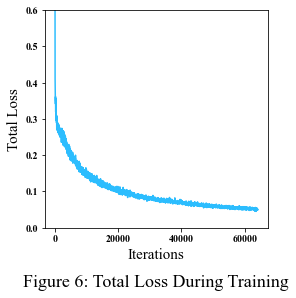

In [94]:
import json
metrics = {}
with open('metrics.json') as fp:
    linesRaw = fp.readlines()
    keys = json.loads(linesRaw[0]).keys()
    
    # Fill metrics obj with blank lists for each metric
    print("Data you can potentially plot:")
    for key in keys:
        metrics[key] = []
        print(key)
    
    # Move each metric to their own list to make plotting easier
    for line in linesRaw:
        line = json.loads(line)
        for key in keys:
            metrics[key].append( line[key] )

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(metrics['iteration'], metrics['total_loss'])
ax.set_ylim([0, 0.6])
#plt.title('Figure 6: Total Loss During Training', y=-0.3) do this in google docs
plt.ylabel("Total Loss")
plt.xlabel("Iterations")
#plt.savefig("filepath.svg", format = 'svg', dpi=300) NOT SUPPORTED BY GOOGLE DOCS (SAD!)
plt.show()

(array([ 93.,  35.,  23.,  19.,  15.,  11.,  20.,  22.,   7., 141.]),
 array([0.05035124, 0.14531596, 0.24028068, 0.3352454 , 0.43021012,
        0.52517485, 0.62013957, 0.71510429, 0.81006901, 0.90503373,
        0.99999845]),
 <BarContainer object of 10 artists>)

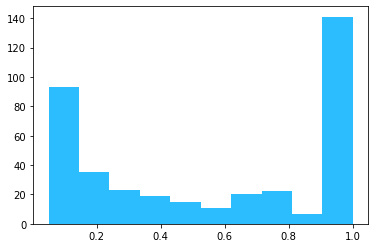

In [38]:
# Histograms are low key kinda lame because bins - Use CDF below instead
scores = []
with open('coco_instances_results.json') as fp:
    coco = json.load(fp)
    for a in coco:
        scores.append(a['score'])
plt.hist(scores)

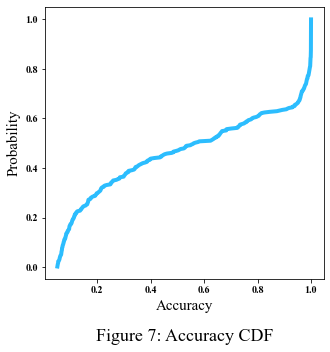

In [93]:
from empiricaldist import Cdf

# Create the distribution
cdf_dist = Cdf.from_seq(scores)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(cdf_dist, linewidth=4)
#plt.title('Figure 7: Accuracy CDF', y=-0.25) Do this in google docs incase we change the order
plt.ylabel("Probability")
plt.xlabel("Accuracy")

#plt.savefig("filepath.svg", format = 'svg', dpi=300) NOT SUPPORTED BY GOOGLE DOCS (SAD!)
plt.show();